Task given by 'Priyasha Rathore' from INSAID                                                       
Auther Name  =  Ramdas Balasaheb Yamgar                                                          
Project Name =  Fraud Transactions

# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # Data processing
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns # Data visualization
from sklearn.preprocessing import LabelEncoder # Label Encoding
from sklearn.preprocessing import MinMaxScaler #Data scaling
from imblearn.over_sampling import SMOTE # Balancing data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
from sklearn.metrics import roc_auc_score,roc_curve
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df.shape

(6362620, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
# Checking Nulls
df.isna().mean()*100

step              0.0
type              0.0
amount            0.0
nameOrig          0.0
oldbalanceOrg     0.0
newbalanceOrig    0.0
nameDest          0.0
oldbalanceDest    0.0
newbalanceDest    0.0
isFraud           0.0
isFlaggedFraud    0.0
dtype: float64

In [7]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
pd.set_option('display.float_format', '{:.2f}'.format) # To see actual values
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [9]:
df.describe(include= 'object')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1902386530,C1286084959
freq,2237500,3,113


In [10]:
df.duplicated().sum()

0

<AxesSubplot:xlabel='type', ylabel='count'>

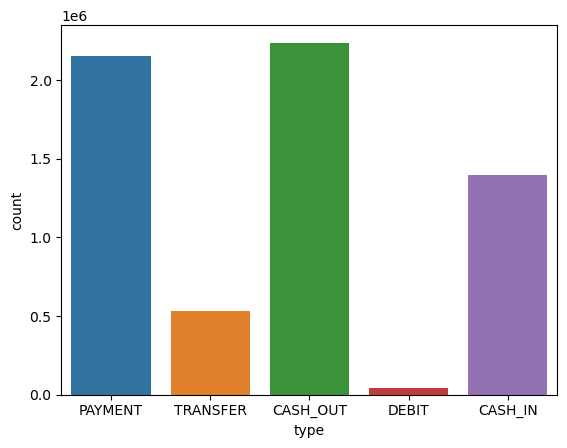

In [11]:
sns.countplot(df['type'])

In [12]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

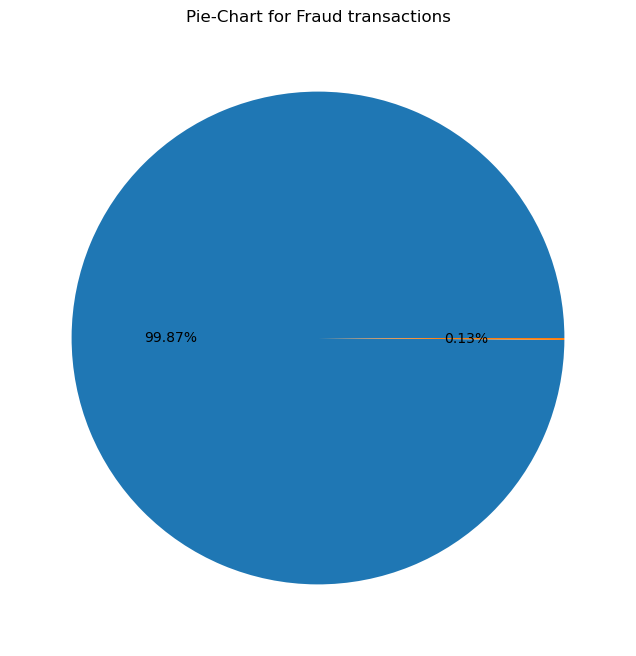

In [13]:
plt.figure(figsize=(12,8))
plt.title('Pie-Chart for Fraud transactions')
plt.pie(df['isFraud'].value_counts(),  autopct='%.2f%%')
plt.show()

In [14]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [15]:
((df.loc[df["isFraud"]== 1]).groupby("type").sum())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,
CASH_OUT,1513537,5989202243.83,5984124999.99,298767.61,4465524469.93,10493926819.76,4116,0
TRANSFER,1512246,6067213184.01,7564595045.72,1579821917.66,4397651.53,16311839.86,4097,16


Text(0, 0.5, 'Is Fraud')

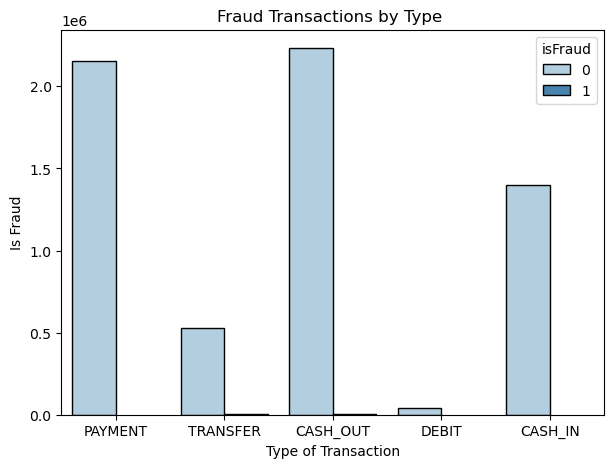

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(x='type',hue='isFraud',palette='Blues',data=df,edgecolor="black")
plt.title("Fraud Transactions by Type ")
plt.xlabel("Type of Transaction")
plt.ylabel("Is Fraud")

In [17]:
((df.loc[df["isFlaggedFraud"]== 1]).groupby("type").sum())

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,
TRANSFER,8601,77785563.69,125085904.19,125085904.19,0.00,0.00,16,16


Text(0, 0.5, 'is Flagged Fraud')

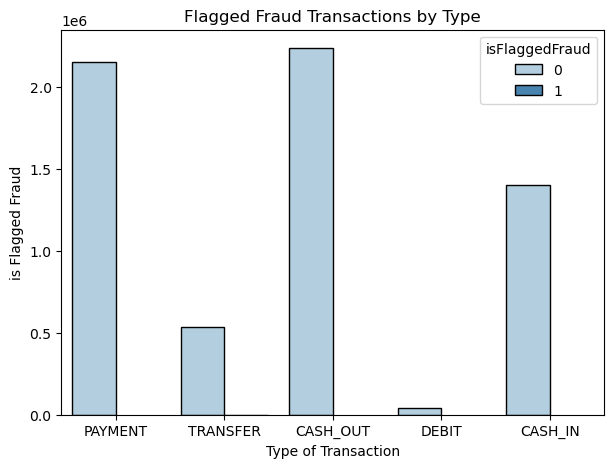

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(x='type',hue='isFlaggedFraud',palette='Blues',data=df,edgecolor="black")
plt.title("Flagged Fraud Transactions by Type")
plt.xlabel("Type of Transaction")
plt.ylabel("is Flagged Fraud")

  from above we conlcude that                                                      
1) Only in CASH_OUT and TRANSFER type "Fraud" is happen                                                 
2) Only 16 times "Flagged Fraud" happen which is also in TRANSFER type.

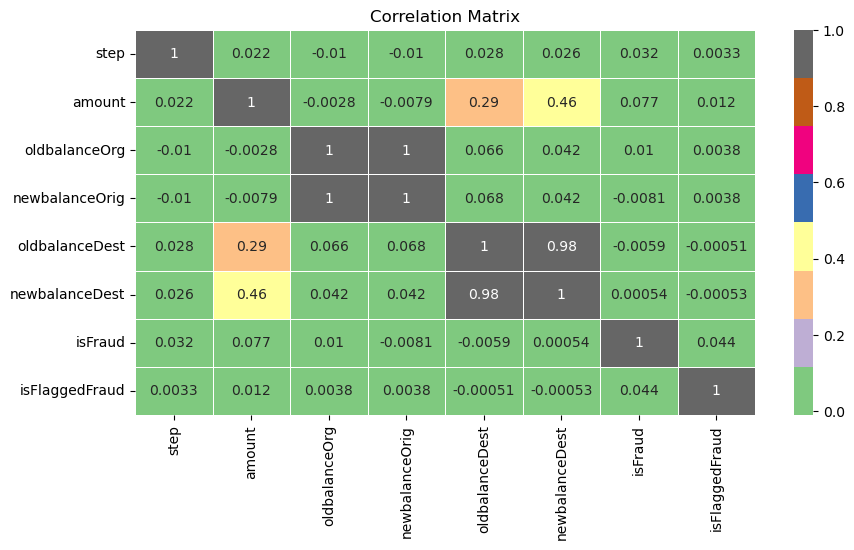

In [19]:
#check for correlation
ig ,ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=df.corr(),cmap="Accent",annot=True,linewidths=.5,ax=ax).set_title("Correlation Matrix")
plt.show()

So multicollinearity exists between "oldbalanceOrg" and "newbalanceOrg" ; "oldbalanceDest" and "newbalanceDest". 

Let us try to build the model without removing features.

# Feature engineering

In [20]:
print("Shape : ",(df.loc[(df["isFraud"] == 1 ) & (df["isFlaggedFraud"] == 1 )]).shape)
df.loc[(df["isFraud"] == 1 ) & (df["isFlaggedFraud"] == 1 )]

Shape :  (16, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.00,0.00,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.00,0.00,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.00,0.00,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.00,0.00,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.00,0.00,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.00,0.00,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.00,0.00,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.00,0.00,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.00,0.00,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.00,0.00,1,1


Conclusion:
When "Flagged Fraud" is happen also "Fraud" is happen, So, Don't need of "Flagged Fraud" feature that's why we drop it

# Lebel Encoding

In [21]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [22]:
# checking Object Columns
df.columns[df.dtypes == 'object']

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [23]:
# for Label Encoder

le = {}
for i in df.select_dtypes('object').columns:
    le[i] = LabelEncoder()
    df[i] = le[i].fit_transform(df[i])

In [24]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0


# Balancing Dependent Variable

In [25]:
# cheacking dependent variable is balanced or not?
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [26]:
X = df.drop(columns=['isFraud'])
y = df['isFraud']

In [27]:
over_sample = SMOTE()
X,y = over_sample.fit_resample(X,y)

In [28]:
y.value_counts() #resampled

0    6354407
1    6354407
Name: isFraud, dtype: int64

# Train Test Split

In [29]:
#import required libraries and split the data into train anad test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10167051, 10)
(2541763, 10)
(10167051,)
(2541763,)


# Scaling values

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

# Model Building

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

pred_logreg = logreg.predict(X_test)

In [33]:
conf_logreg = confusion_matrix(y_test , pred_logreg)
print("Confusion Matrix :")
print(conf_logreg)
print(" ")
print("Accuracy    :", accuracy_score( y_test, pred_logreg ) * 100)
print("Precision   :", precision_score( y_test, pred_logreg ) * 100)
print("TPR/ Recall :", recall_score( y_test, pred_logreg ) * 100)
print("FPR         :", conf_logreg[0][1] / ( conf_logreg[0][1] * conf_logreg[0][0] ) *100)
print("F1_Ratio    :", f1_score( y_test, pred_logreg ) * 100)

Confusion Matrix :
[[1199565   73043]
 [ 116268 1152887]]
 
Accuracy    : 92.55198065279886
Precision   : 94.04182946824044
TPR/ Recall : 90.83894402180978
FPR         : 8.33635526211585e-05
F1_Ratio    : 92.41264325664257


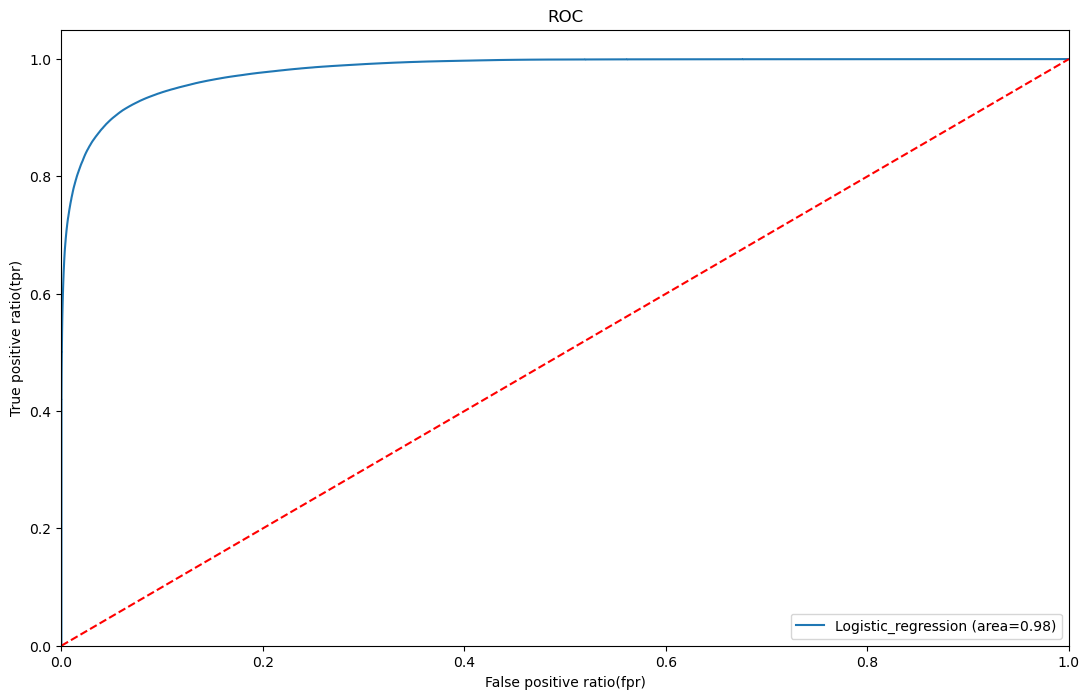

In [34]:
#plotting the roc curve and getting the value of auroc 

logit_roc_auc=roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1])
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr,tpr,label="Logistic_regression (area=%0.2f)"% logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive ratio(fpr)")
plt.ylabel("True positive ratio(tpr)")
plt.title("ROC")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

# Checking our Model is Overfit or Not

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cvs = cross_val_score(logreg,X,y,cv=3)
print(cvs)

[0.94134843 0.95013728 0.90772687]


In [37]:
cvs.mean()

0.9330708586751232

Cross validation score is less than accuracy. So this is a case of underfitting.

Trying to improve accuracy by removing multi-collinearity and selecting the best features

# Improving accuracy
Select the best 8 features

In [38]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


Now we can build a new logistic regression model using only these 8 features

In [39]:
df.drop(["nameOrig","nameDest"],inplace=True,axis=1)

In [40]:
df.tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0
6362619,743,1,850002.52,850002.52,0.00,6510099.11,7360101.63,1,0


Now we can build a new logistic regression model using only these 8 features

In [41]:
X_new = df.iloc[:,:-1]
y_new = df.iloc[:,-1]

In [42]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.30, random_state=19)

In [43]:
#  Scaling values
X_new_train = scaler.fit_transform(X_new_train)

X_new_test = scaler.transform(X_new_test)

In [44]:
logreg_new = LogisticRegression()

logreg_new.fit(X_new_train, y_new_train)

pred_new_logreg = logreg_new.predict(X_new_test)

In [45]:
conf_new_logreg = confusion_matrix(y_new_test , pred_new_logreg)
print("Confusion Matrix :")
print(conf_logreg)
print(" ")
print("Accuracy    :", accuracy_score(y_new_test , pred_new_logreg) * 100)
print("Precision   :", precision_score(y_new_test , pred_new_logreg) * 100)
print("TPR/ Recall :", recall_score(y_new_test , pred_new_logreg) * 100)
print("FPR         :", conf_new_logreg[0][1] / ( conf_new_logreg[0][1] * conf_new_logreg[0][0] ) *100)
print("F1_Ratio    :", f1_score(y_new_test , pred_new_logreg) * 100)

Confusion Matrix :
[[1199565   73043]
 [ 116268 1152887]]
 
Accuracy    : 99.99984283204088
Precision   : 0.0
TPR/ Recall : 0.0
FPR         : nan
F1_Ratio    : 0.0


# So final accuracy turns out to be 99.99%, which is a big improvement from previous case